In [4]:
# Import libraries

import pandas as pd
import seaborn as sns
import numpy as np
from scipy.stats import f_oneway

import matplotlib
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from matplotlib.pyplot import figure
from mpl_toolkits.mplot3d import Axes3D

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8) # Adjusts the configuration of the plots we will create

#Read in the Data

df = pd.read_csv(r'C:\Users\Evan Blair\Downloads\movies.csv')


In [6]:
# Let's Look at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [8]:
# Lets look if there is any missing data

for col in df.columns:
    percent_missing = np.mean(df[col].isnull())
    print('{} - {}%' .format(col, percent_missing))
    

name - 0.0%
rating - 0.010041731872717789%
genre - 0.0%
year - 0.0%
released - 0.0002608242044861763%
score - 0.0003912363067292645%
votes - 0.0003912363067292645%
director - 0.0%
writer - 0.0003912363067292645%
star - 0.00013041210224308815%
country - 0.0003912363067292645%
budget - 0.2831246739697444%
gross - 0.02464788732394366%
company - 0.002217005738132499%
runtime - 0.0005216484089723526%


In [10]:
# Lets remove the missing data

df=df.dropna()

In [12]:
# Looking at the Data types for our columns

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [14]:
# Changing data type of budget, gross, votes, and runtime to intiger values to remove decimals

df['budget'] = df['budget'].astype('int64')
df['gross'] = df['gross'].astype('int64')
df['votes'] = df['votes'].astype('int64')
df['runtime'] = df['runtime'].astype('int64')

In [16]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98


In [18]:
# Year column and released column are different years
# Create a column to fix the incorrect year column

df['yearcorrect'] = df['released'].astype(str).str.split().str[2]

In [220]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [251]:
# Sorting by highest grossing movies

df.head().sort_values(by=['gross'], inplace=False, ascending=False)

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,yearcorrect
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104,1980
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98,1980


In [223]:
# Viewing the full dataset

pd.set_option('display.max_rows', None)

In [261]:
# Looking for duplicates to remove

df['company'].drop_duplicates().sort_values(ascending=False).head()
df['name'].drop_duplicates().sort_values(ascending=False).head()


4722                      Æon Flux
4761       xXx: State of the Union
7112    xXx: Return of Xander Cage
4083                           xXx
3503                      eXistenZ
Name: name, dtype: object

In [259]:
#Looking at companies that have the highest grossing movies

df[['gross','company','name']].sort_values(by=['gross'],ascending=False).head()

,gross,company,name
5445,2847246203,Twentieth Century Fox,Avatar
7445,2797501328,Marvel Studios,Avengers: Endgame
3045,2201647264,Twentieth Century Fox,Titanic
6663,2069521700,Lucasfilm,Star Wars: Episode VII - The Force Awakens
7244,2048359754,Marvel Studios,Avengers: Infinity War


In [226]:
# Testing budget correlation to gross earnings

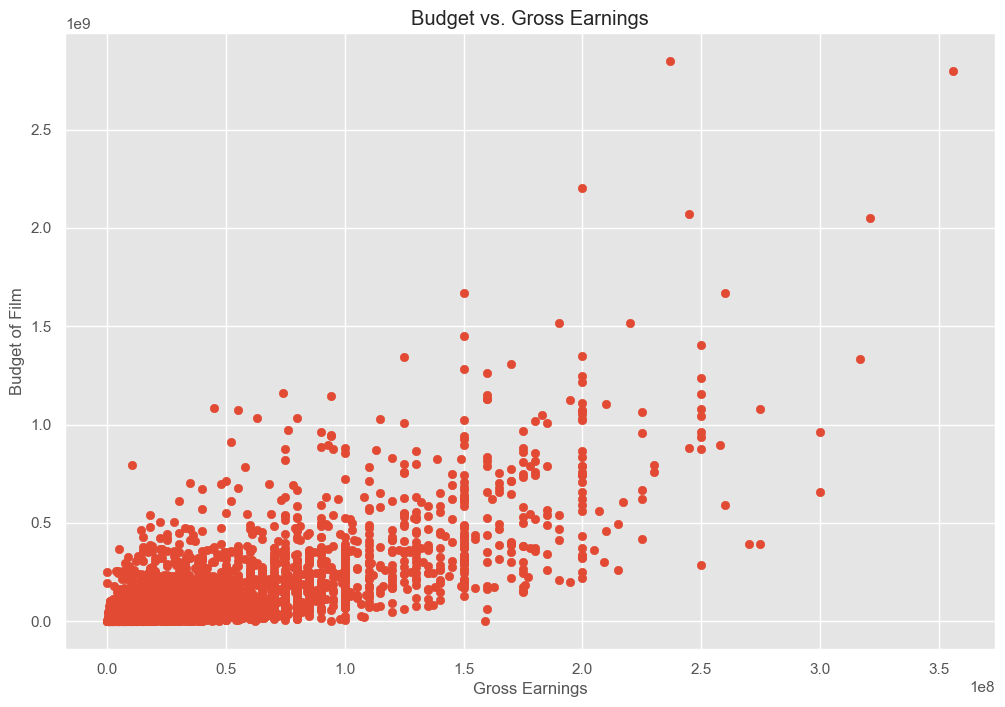

In [230]:
# Making a scatter plot for budget vs gross

plt.scatter(x=df['budget'], y =df['gross'])
plt.title('Budget vs. Gross Earnings')

plt.xlabel('Gross Earnings')
plt.ylabel('Budget of Film')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

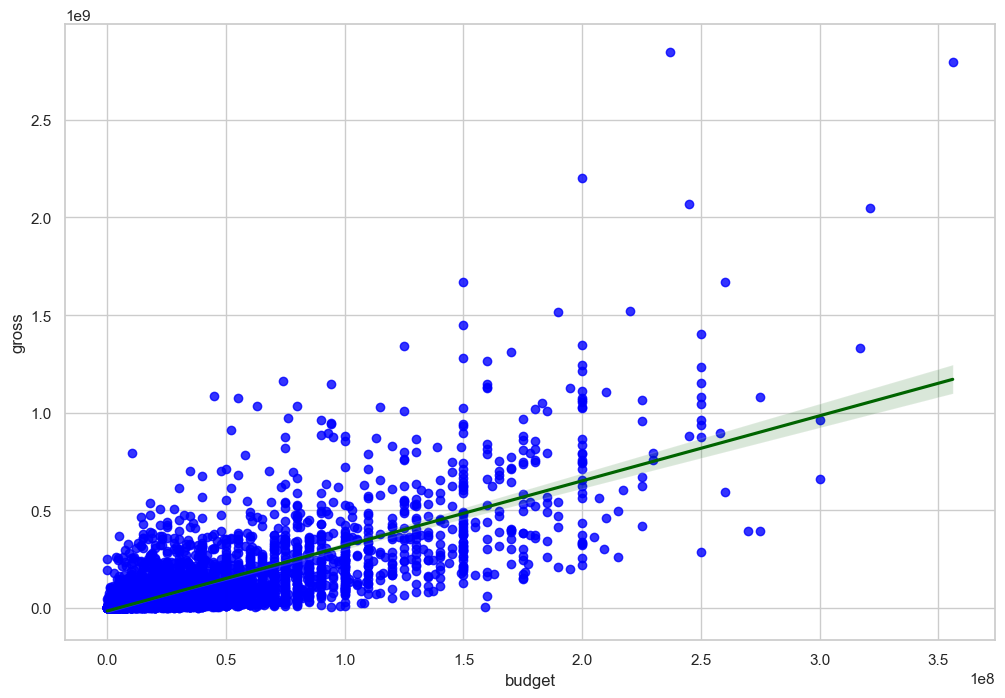

In [234]:
# Plot the budget versus gross using seaborn

sns.set(style= 'whitegrid')
sns.regplot(x='budget', y='gross', data = df, scatter_kws={"color": "blue"}, line_kws= {"color":"darkgreen"})

In [236]:
 # Loooking at correlation

df.corr(method='pearson',numeric_only = True) #Can use pearson, kendal, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.056386,0.206021,0.327722,0.274321,0.075077
score,0.056386,1.000000,0.474256,0.072001,0.222556,0.414068
votes,0.206021,0.474256,1.000000,0.439675,0.614751,0.352303
budget,0.327722,0.072001,0.439675,1.000000,0.740247,0.318695
gross,0.274321,0.222556,0.614751,0.740247,1.000000,0.275796
runtime,0.075077,0.414068,0.352303,0.318695,0.275796,1.000000


In [238]:
# High correlation between budget and gross earnings

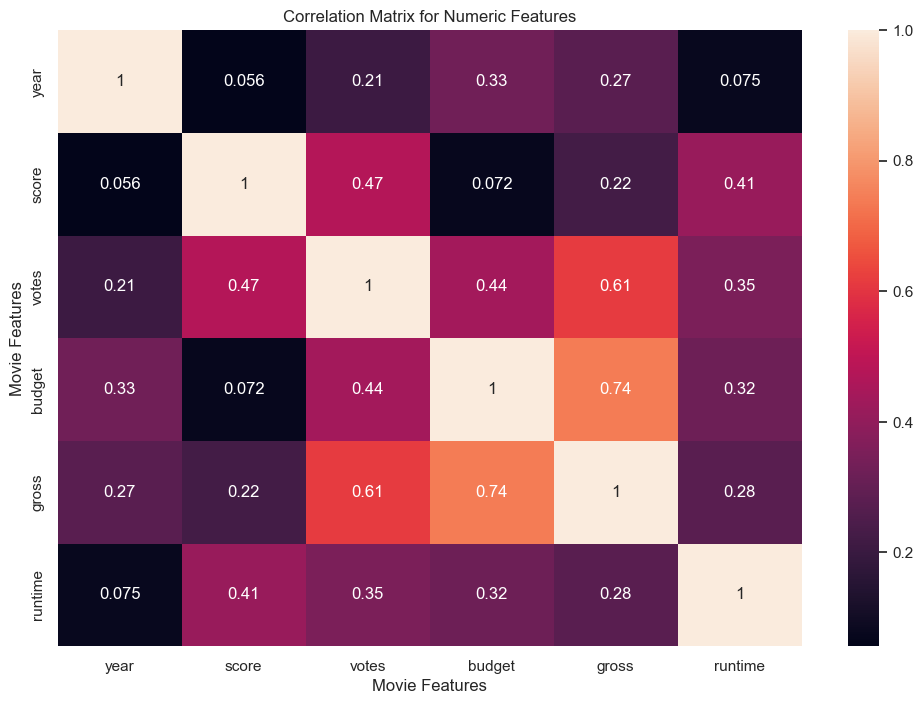

In [240]:
# Lets make a visulization of the correlating numeric values

correlation_matrix = df.corr(method='pearson',numeric_only=True) 

sns.heatmap(correlation_matrix,annot=True)
plt.title('Correlation Matrix for Numeric Features')
plt.xlabel('Movie Features')
plt.ylabel('Movie Features')
plt.show()

In [242]:
# Finding percentage of companies occurance in the top 50 grossing movies 

df_sortedgross = df.sort_values(by=['gross'],ascending=False)

Top_50_gross = df_sortedgross.head(50)

company_name = Top_50_gross['company'].tolist()
company_counts = Top_50_gross['company'].value_counts()
total_company = company_counts.sum()
company_percentages = (company_counts / total_company) * 100

for company, percentage in company_percentages.items():
    print(f'{company}: {percentage:.2f}%')

Walt Disney Pictures: 24.00%
Marvel Studios: 14.00%
Universal Pictures: 12.00%
Warner Bros.: 12.00%
Lucasfilm: 6.00%
Twentieth Century Fox: 4.00%
Walt Disney Animation Studios: 4.00%
Illumination Entertainment: 4.00%
Paramount Pictures: 4.00%
Metro-Goldwyn-Mayer (MGM): 4.00%
Pixar Animation Studios: 4.00%
Mandeville Films: 2.00%
New Line Cinema: 2.00%
Columbia Pictures: 2.00%
Fairview Entertainment: 2.00%


In [244]:
# looking at the most profitable companies of the last decade (2010-2020)

filtered_df = df[df['year'] > 2010]
df_sortedgrossdecade = filtered_df.sort_values(by=['gross'], ascending=False)

company_name = df_sortedgrossdecade['company'].tolist()
company_counts = df_sortedgrossdecade['company'].value_counts()
total_company = company_counts.sum()
company_percentages = (company_counts / total_company) * 100

for company, percentage in company_percentages.items():
    print(f'{company}: {percentage:.2f}%')

Universal Pictures: 5.45%
Columbia Pictures: 5.23%
Warner Bros.: 4.35%
Paramount Pictures: 4.35%
Twentieth Century Fox: 3.24%
Summit Entertainment: 3.17%
Walt Disney Pictures: 2.36%
Lionsgate: 2.21%
New Line Cinema: 2.14%
Fox 2000 Pictures: 1.69%
Screen Gems: 1.40%
Focus Features: 1.18%
CBS Films: 1.11%
Metro-Goldwyn-Mayer (MGM): 1.11%
Relativity Media: 1.03%
Dreamworks Pictures: 1.03%
Fox Searchlight Pictures: 1.03%
DreamWorks Animation: 1.03%
New Regency Productions: 0.96%
Alcon Entertainment: 0.88%
Marvel Studios: 0.88%
Annapurna Pictures: 0.88%
Blumhouse Productions: 0.74%
The Weinstein Company: 0.74%
TriStar Pictures: 0.66%
BRON Studios: 0.66%
EuropaCorp: 0.66%
Chernin Entertainment: 0.52%
Exclusive Media Group: 0.52%
Open Road Films (II): 0.52%
StudioCanal: 0.44%
A24: 0.44%
STX Entertainment: 0.44%
Worldview Entertainment: 0.44%
Millennium Films: 0.44%
Dimension Films: 0.37%
FilmDistrict: 0.37%
IM Global: 0.37%
Legendary Entertainment: 0.37%
Cross Creek Pictures: 0.37%
Pixar Anim

In [246]:
# Budget has a high correlation with the gross earnings
# Companies like Walt Disney Pictures, Warner Bros., and Universal Pictures have some of the highest grossing movies
